### This is a utility notebook showing how to export the sensitivity analysis data in 1-d array format 
This notebook is just a data exporting demonstration. Not the main file. 


In [1]:
## Import all the files here 

from bioscrape.types import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import style
%config InlineBackend.figure_format = 'retina'
plt.rcParams["font.family"] = "arial"
%config InlineBackend.figure_format = 'retina'

style.use("default")

%matplotlib inline

In [2]:
## Import the BioCRNpyler model to be analyzed 

model_degtag = Model(sbml_filename = 'Biocrnpyler_model_degtag_030225.xml')
model_no_tag = Model(sbml_filename = 'Biocrnpyler_model_no_degtag_030225.xml')

N_steps = 720*40
t_final = 720
timepoints = np.linspace(0, t_final, N_steps)

tf_i = 720*40  # Index for the last wanted timepoint 

In [3]:
# Loading the stored SSM datafiles 

SSM_deg = np.load('SSM_deg_abs_031425_v3.npy')
SSM_no_deg = np.load('SSM_no_tag_abs_031425_v3.npy')

tf_I = int(len(SSM_deg) * 1) # Last index from the time axis in the SSM

# Saving the first 720 mins of data
SSM_deg = SSM_deg[:tf_I,:]
SSM_no_deg = SSM_no_deg[:tf_I,:]

# Printing the shape of the SSM to check dimensions
np.shape(SSM_deg)

(28800, 32, 19)

In [4]:
params_deg = ['k_tx_1b__bacterial_transcription',
 'k_tx_1u__bacterial_transcription',
 'RNAP_max__bacterial_transcription',
 'c_max__logistic_cell_growth',
 'k_tx_2b__bacterial_transcription',
 'k_tx_2u__bacterial_transcription',
 'b_tx_4u__mrna_degradation',
 'k_tx_3__bacterial_transcription',
 'k_tl_1b__bacterial_translation',
 'k_tl_1u__bacterial_translation',
 'Et_max__bacterial_translation',
 'k_tl_2b__bacterial_translation',
 'k_tl_2u__bacterial_translation',
 'tRNA_max__bacterial_translation',
 'k_tl_3b__bacterial_translation',
 'k_tl_3u__bacterial_translation',
 'Ribo_max__bacterial_translation',
 'k_tl_4__bacterial_translation',
 'k_tl_5__bacterial_translation',
 'b_tl_5__bacterial_translation',
 'k_tl_8__bacterial_translation',
 'k_tl_10__bacterial_translation',
 'k_tl_9b_P__bacterial_translation',
 'k_tl_9u__bacterial_translation',
 'Protease_max__bacterial_translation',
 'k_tl_6__bacterial_translation',
 'k_tl_9b_Pm__bacterial_translation',
 'k__logistic_cell_growth',
 'k_tx_4b__mrna_degradation',
 'k_tx_4u__mrna_degradation',
 'k_tx_5__mrna_degradation',
 'k_tl_7__non_tag_degradation']

params_no_deg = ['k_tx_1b__bacterial_transcription',
 'k_tx_1u__bacterial_transcription',
 'RNAP_max__bacterial_transcription',
 'c_max__logistic_cell_growth',
 'k_tx_2b__bacterial_transcription',
 'k_tx_2u__bacterial_transcription',
 'b_tx_4u__mrna_degradation',
 'k_tx_3__bacterial_transcription',
 'k_tl_1b__bacterial_translation',
 'k_tl_1u__bacterial_translation',
 'Et_max__bacterial_translation',
 'k_tl_2b__bacterial_translation',
 'k_tl_2u__bacterial_translation',
 'tRNA_max__bacterial_translation',
 'k_tl_3b__bacterial_translation',
 'k_tl_3u__bacterial_translation',
 'Ribo_max__bacterial_translation',
 'k_tl_4__bacterial_translation',
 'k_tl_5__bacterial_translation',
 'b_tl_5__bacterial_translation',
 'k_tl_8__bacterial_translation',
 'k_tl_10__bacterial_translation',
 'k__logistic_cell_growth',
 'k_tx_4b__mrna_degradation',
 'k_tx_4u__mrna_degradation',
 'k_tx_5__mrna_degradation',
 'k_tl_7__non_tag_degradation']

In [5]:
model_degtag.get_species2index()

{'dna_X': 0,
 'protein_sigma_machinery': 1,
 'protein_holoenzyme_machinery': 2,
 'protein_NT_units': 3,
 'rna_T_X': 4,
 'complex_dna_X_protein_holoenzyme_machinery_': 5,
 'protein_AA_units0tl': 6,
 'protein_X': 7,
 'protein_unfolded_protein_degtag': 8,
 'protein_peptide_chain_peptide': 9,
 'protein_Ct_machinery': 10,
 'protein_Caa_machinery': 11,
 'protein_Ctic_machinery': 12,
 'protein_C_deg_unfolded_machinery': 13,
 'protein_C_deg_folded_machinery': 14,
 'protein_RNAase_machinery': 15,
 'cell_count_count': 16,
 'complex_dna_X_protein_holoenzyme_machinery_open_': 17,
 'complex_protein_RNAase_machinery_rna_T_X_': 18}

In [6]:
# Obtaining the parameters and number of parameters in each model for further analysis

# a_deg = model_degtag.get_parameter_values()
a_deg = params_deg
Np_deg = len(a_deg)

# a_no_deg = model_no_tag.get_parameter_values()
a_no_deg = params_no_deg
Np_no_deg = len(a_no_deg)

i_protein = 7

In [7]:
for i in range(Np_deg):
    print(i, params_deg[i])

0 k_tx_1b__bacterial_transcription
1 k_tx_1u__bacterial_transcription
2 RNAP_max__bacterial_transcription
3 c_max__logistic_cell_growth
4 k_tx_2b__bacterial_transcription
5 k_tx_2u__bacterial_transcription
6 b_tx_4u__mrna_degradation
7 k_tx_3__bacterial_transcription
8 k_tl_1b__bacterial_translation
9 k_tl_1u__bacterial_translation
10 Et_max__bacterial_translation
11 k_tl_2b__bacterial_translation
12 k_tl_2u__bacterial_translation
13 tRNA_max__bacterial_translation
14 k_tl_3b__bacterial_translation
15 k_tl_3u__bacterial_translation
16 Ribo_max__bacterial_translation
17 k_tl_4__bacterial_translation
18 k_tl_5__bacterial_translation
19 b_tl_5__bacterial_translation
20 k_tl_8__bacterial_translation
21 k_tl_10__bacterial_translation
22 k_tl_9b_P__bacterial_translation
23 k_tl_9u__bacterial_translation
24 Protease_max__bacterial_translation
25 k_tl_6__bacterial_translation
26 k_tl_9b_Pm__bacterial_translation
27 k__logistic_cell_growth
28 k_tx_4b__mrna_degradation
29 k_tx_4u__mrna_degradati

In [8]:
## Arrange indices according to the categories

i_sorted_deg = [0, 1, 2, 4, 5, 6, 7, 28, 29, 30,  # mRNA dynamics related params
                8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 31,  # Protein dynamics related params
                3, 27] # Growth dynamics related params

len(i_sorted_deg)

31

In [9]:
for i in range(Np_no_deg):
    print(i, params_no_deg[i])

0 k_tx_1b__bacterial_transcription
1 k_tx_1u__bacterial_transcription
2 RNAP_max__bacterial_transcription
3 c_max__logistic_cell_growth
4 k_tx_2b__bacterial_transcription
5 k_tx_2u__bacterial_transcription
6 b_tx_4u__mrna_degradation
7 k_tx_3__bacterial_transcription
8 k_tl_1b__bacterial_translation
9 k_tl_1u__bacterial_translation
10 Et_max__bacterial_translation
11 k_tl_2b__bacterial_translation
12 k_tl_2u__bacterial_translation
13 tRNA_max__bacterial_translation
14 k_tl_3b__bacterial_translation
15 k_tl_3u__bacterial_translation
16 Ribo_max__bacterial_translation
17 k_tl_4__bacterial_translation
18 k_tl_5__bacterial_translation
19 b_tl_5__bacterial_translation
20 k_tl_8__bacterial_translation
21 k_tl_10__bacterial_translation
22 k__logistic_cell_growth
23 k_tx_4b__mrna_degradation
24 k_tx_4u__mrna_degradation
25 k_tx_5__mrna_degradation
26 k_tl_7__non_tag_degradation


In [10]:
## Arrange indices according to the categories

i_sorted_no_deg = [0, 1, 2, 4, 5, 6, 7, 23, 24, 25,  # mRNA dynamics related params
                8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 26,  # Protein dynamics related params
                3, 22] # Growth dynamics related params

len(i_sorted_no_deg)

26

In [11]:
w,h = 3, 6.2

cmap_fig = 'viridis'
clim_common = 1.5

In [12]:
## Scaling the SSM to account for parameters modified by RMFs: 
# Import parameters 
p = pd.read_csv('model_param_file_030525.csv').to_numpy()
p = p[:,2]
# Import simulation data
sol_deg_data_CRN = pd.read_csv('simulation_run_data_720min_deg_tag_030725_28800_points.csv')
time_old_CRN = sol_deg_data_CRN['Time'].to_numpy()
C = sol_deg_data_CRN['Cells'].to_numpy()
C_max = np.max(C)

f = C/C_max 

alpha = 1 - f
gamma = f * (1 - f)
delta = f**5.5/(1 + f**5.5)
rmf_amino_acid_syn = np.power(gamma, p[39])
rmf_folding = np.power(gamma, p[38]) + p[30]

mod_params = dict()

mod_params['k_tx_2u__bacterial_transcription'] = delta 
mod_params['k_tx_4u__mrna_degradation'] = delta 
mod_params['k__logistic_cell_growth'] = alpha
mod_params['k_tl_5__bacterial_translation'] = rmf_folding
mod_params['k_tl_8__bacterial_translation'] = rmf_amino_acid_syn
mod_params['k_tl_7__non_tag_degradation'] = delta

SSM_no_deg[:,5,i_protein] = SSM_no_deg[:,5,i_protein] * mod_params['k_tx_2u__bacterial_transcription']
SSM_no_deg[:,24,i_protein] = SSM_no_deg[:,24,i_protein] * mod_params['k_tx_4u__mrna_degradation']
#SSM_no_deg[:,22,i_protein] = SSM_no_deg[:,5,i_protein] * mod_params['k__logistic_cell_growth'] # not considering it because it is a population scale parameter
SSM_no_deg[:,18,i_protein] = SSM_no_deg[:,18,i_protein] * mod_params['k_tl_5__bacterial_translation']
SSM_no_deg[:,20,i_protein] = SSM_no_deg[:,20,i_protein] * mod_params['k_tl_8__bacterial_translation']
SSM_no_deg[:,26,i_protein] = SSM_no_deg[:,26,i_protein] * mod_params['k_tl_7__non_tag_degradation']

SSM_deg[:,5,i_protein] = SSM_no_deg[:,5,i_protein] * mod_params['k_tx_2u__bacterial_transcription']
SSM_deg[:,29,i_protein] = SSM_no_deg[:,29,i_protein] * mod_params['k_tx_4u__mrna_degradation']
#SSM_deg[:,27,i_protein] = SSM_no_deg[:,5,i_protein] * mod_params['k__logistic_cell_growth'] # not considering it because it is a population scale parameter
SSM_deg[:,18,i_protein] = SSM_no_deg[:,18,i_protein] * mod_params['k_tl_5__bacterial_translation']
SSM_deg[:,20,i_protein] = SSM_no_deg[:,20,i_protein] * mod_params['k_tl_8__bacterial_translation']
SSM_deg[:,31,i_protein] = SSM_no_deg[:,31,i_protein] * mod_params['k_tl_7__non_tag_degradation']

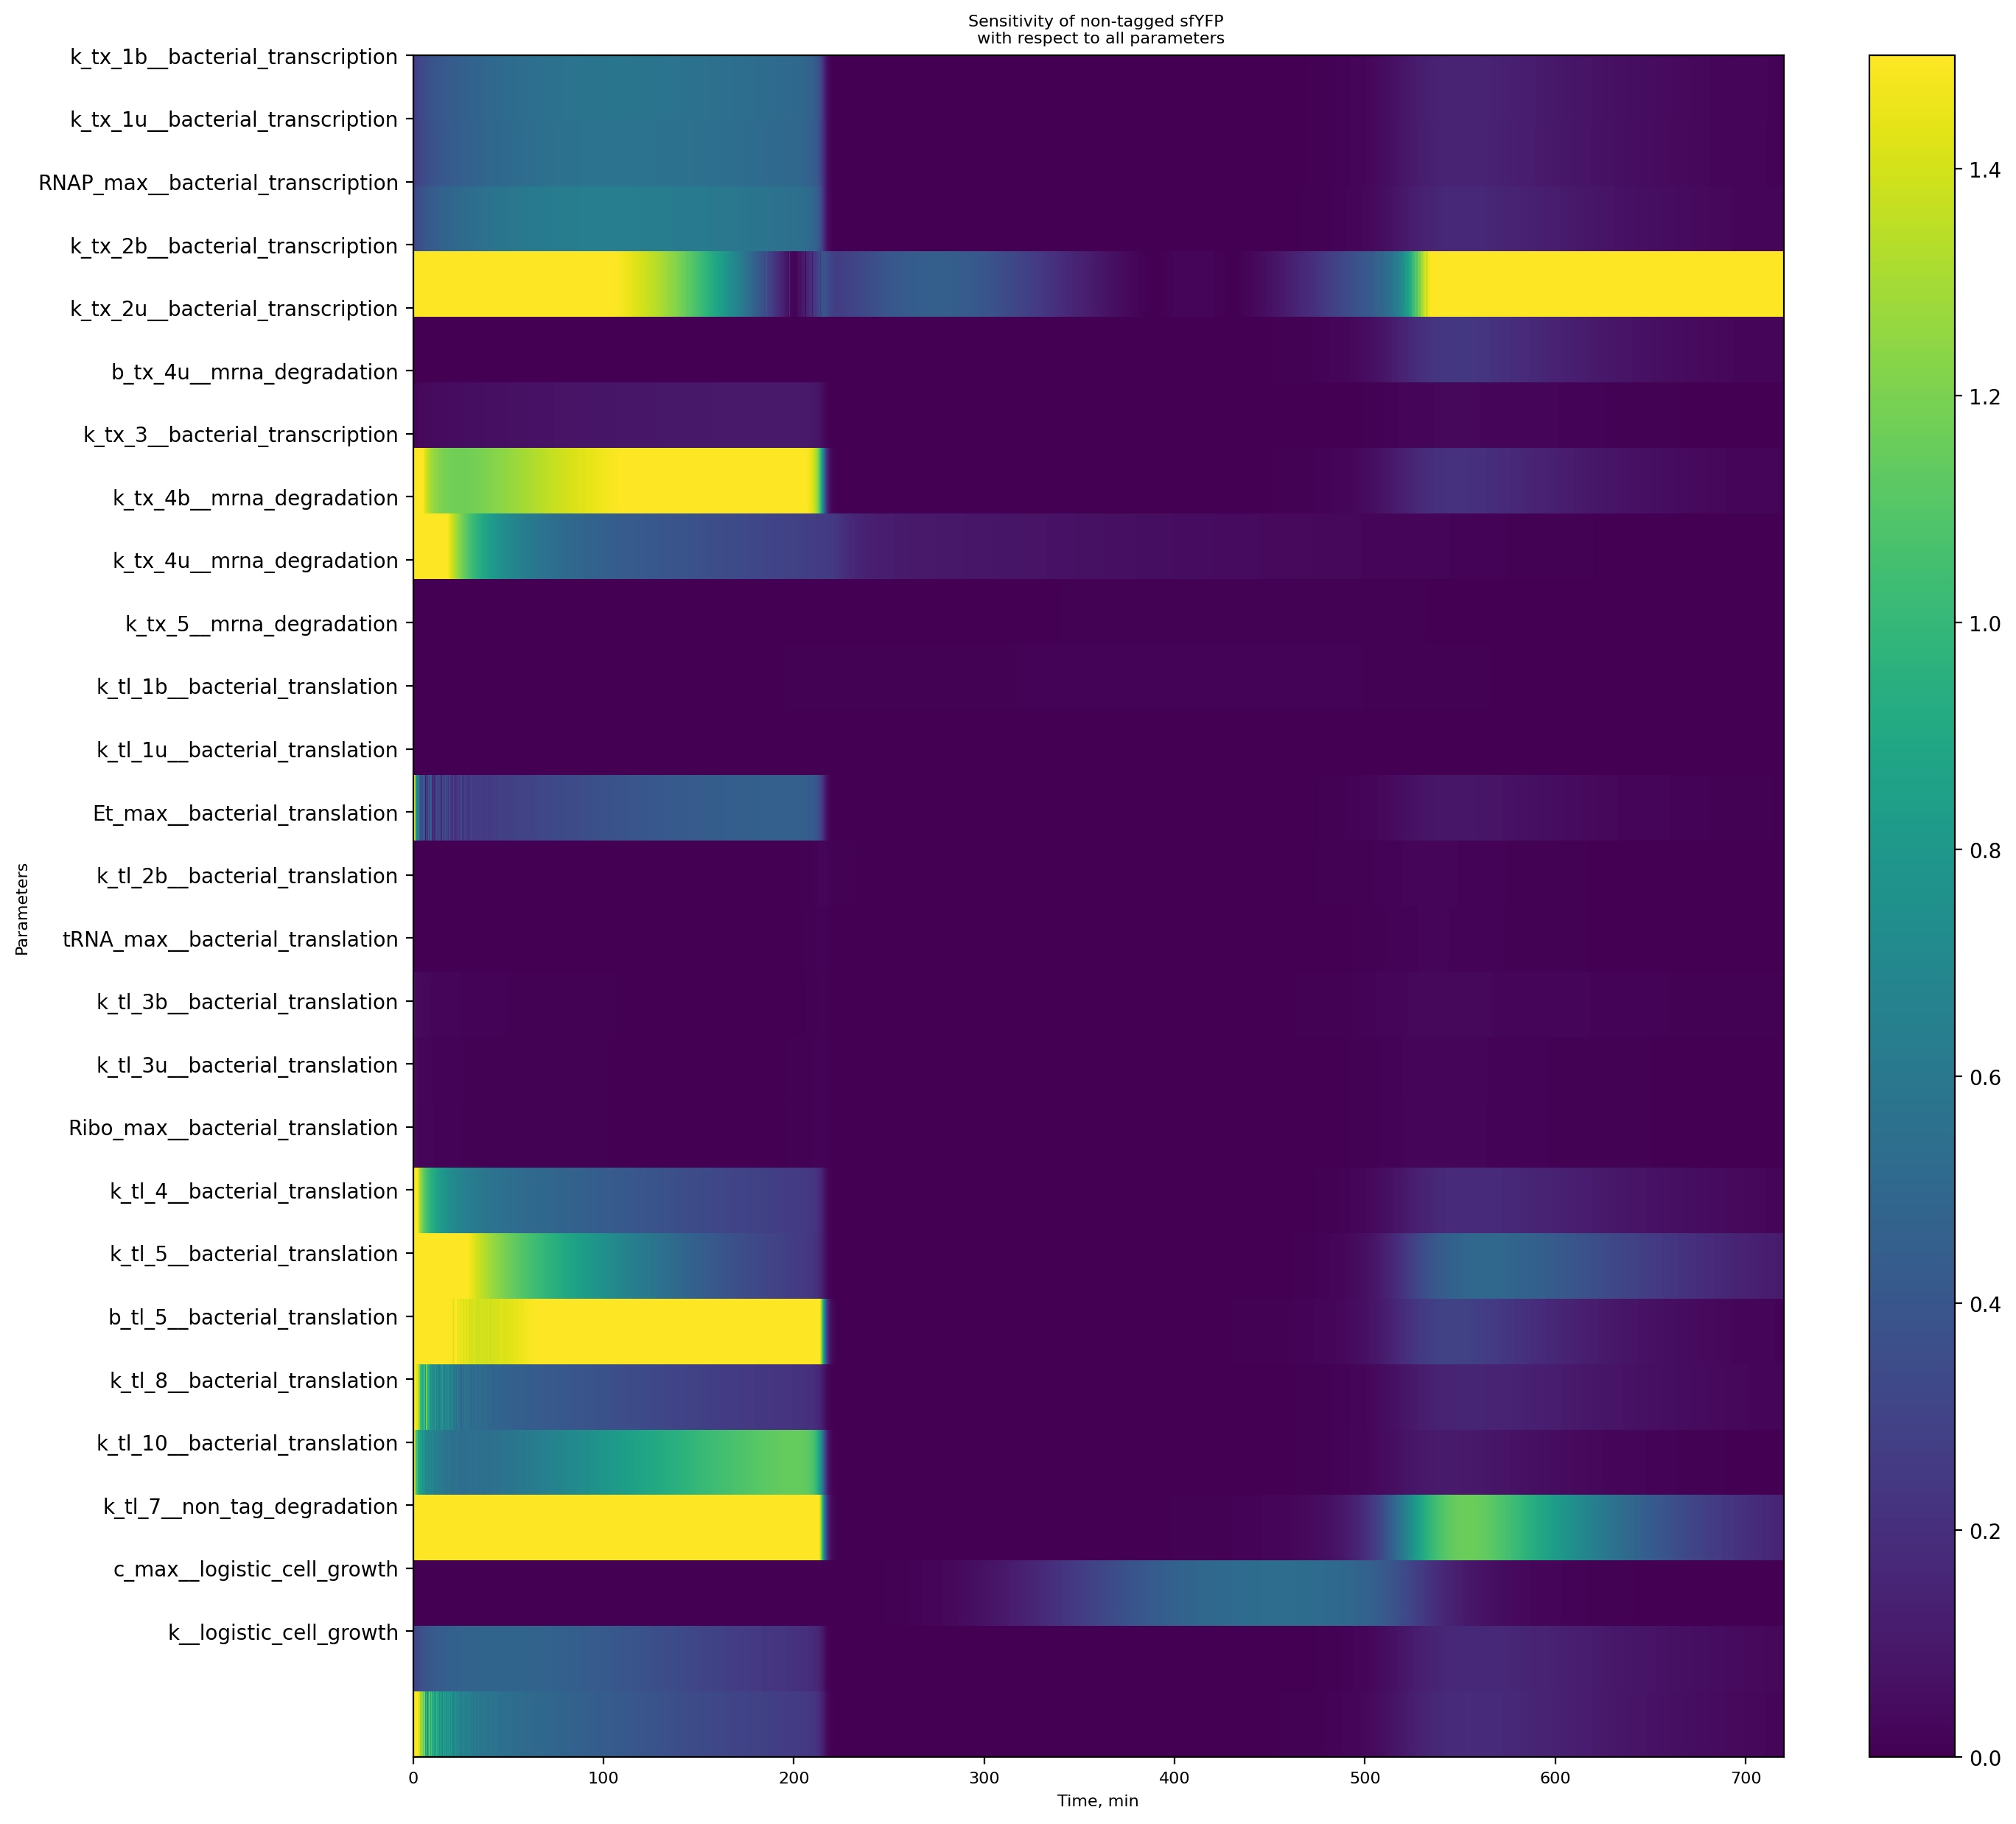

In [13]:
## Plotting the sensitivity matrix for the Protein species without deg-tag
## Plotting the absolute values of the sensitivity matrixc coefficients 

fig, axs = plt.subplots(1,1, figsize = (15,15), sharex = 'col')
h00 = axs.imshow(np.abs(SSM_no_deg[:,i_sorted_no_deg,i_protein].T), cmap = cmap_fig, interpolation = 'nearest', aspect = 'auto', extent = [0,720,Np_no_deg,0],
                    clim = (0, clim_common))
fig.colorbar(h00, ax = axs)
axs.set_ylabel('Parameters', fontsize = 8) ; axs.set_xlabel('Time, min', fontsize = 8)
#axs.yticks(list(model_degtag.get_parameter_dictionary().keys()), fontsize = 5)
axs.set_title('Sensitivity of non-tagged sfYFP \n with respect to all parameters', fontsize = 8)
plt.xticks(fontsize = 8)
#y_ticks = list(model_no_tag.get_parameter_dictionary().keys())[i_sorted_no_deg]
y_ticks = [params_no_deg[i] for i in i_sorted_no_deg]
plt.yticks(range(len(y_ticks)), y_ticks, rotation='horizontal', fontsize = 10);
#axs.axes.get_yaxis().set_visible(False)
#fig.savefig('SSM_no_deg.svg')

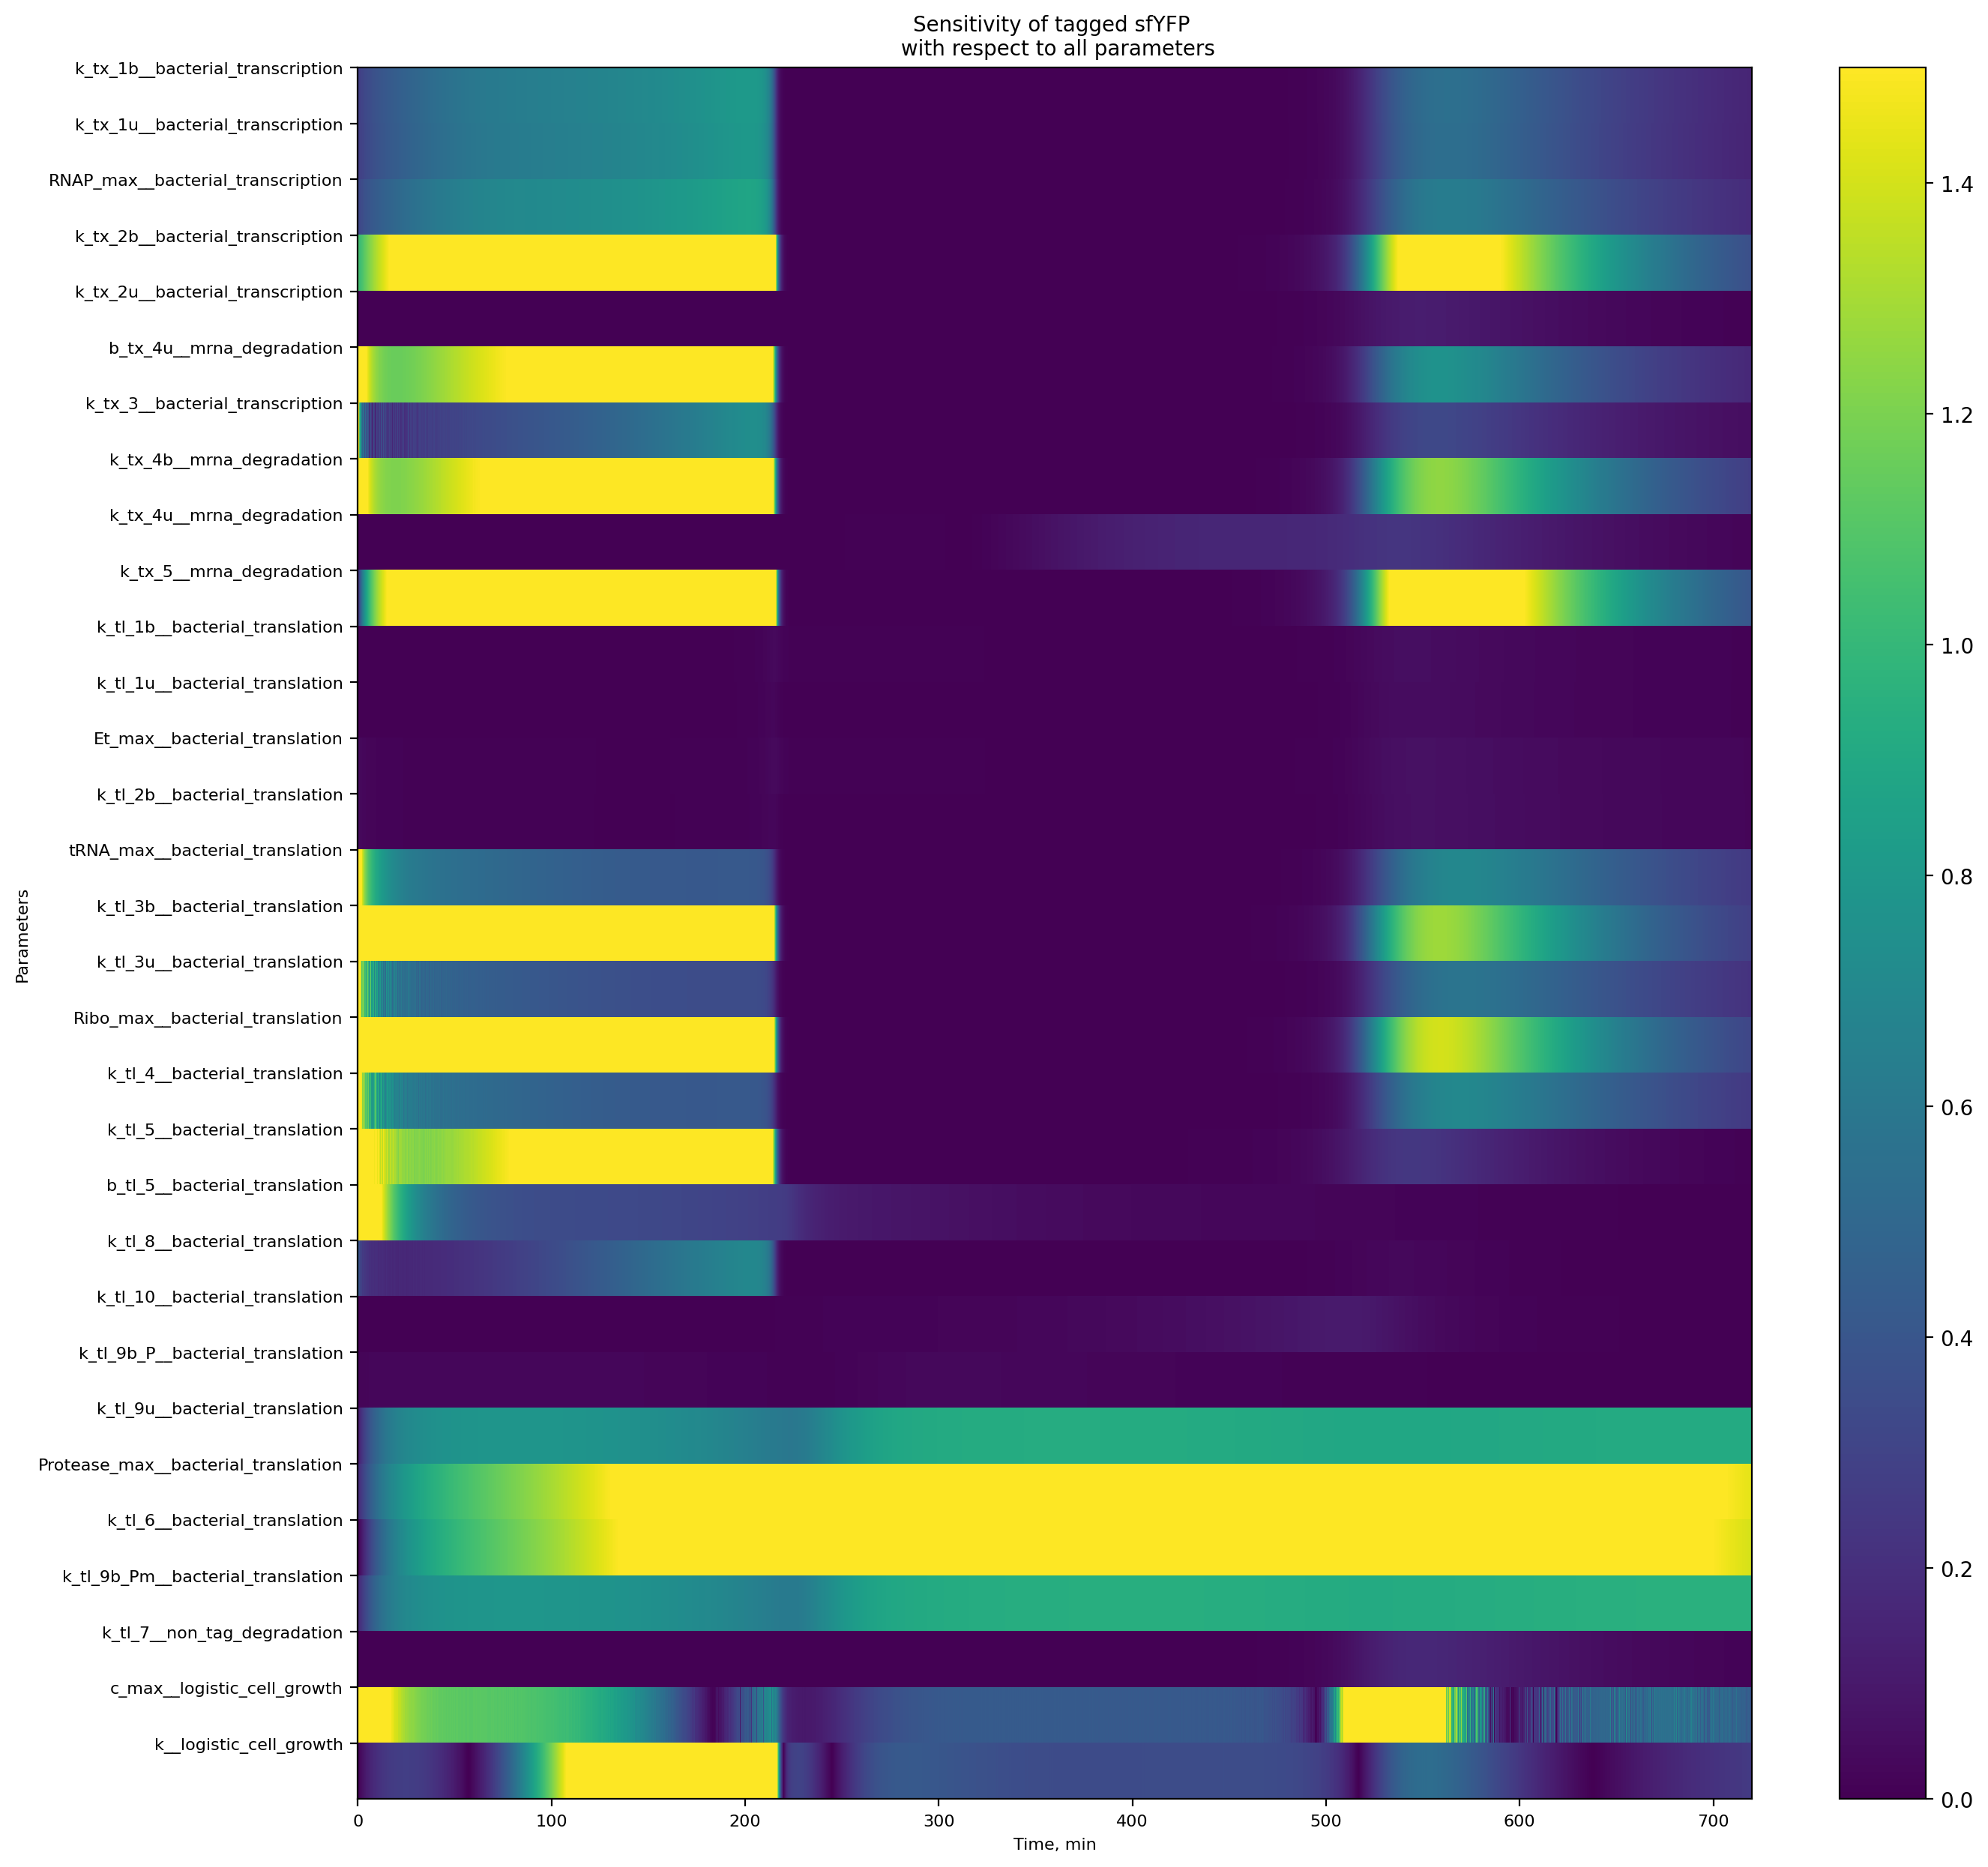

In [14]:
## Plotting the sensitivity matrix for the Protein species with deg-tag
## Plotting the absolute values of the sensitivity matrixc coefficients 

fig, axs = plt.subplots(1,1, figsize = (15,15), sharex = 'col')
h00 = axs.imshow(np.abs(SSM_deg[:,i_sorted_deg,i_protein].T), cmap = cmap_fig, interpolation = 'nearest', aspect = 'auto', extent = [0,720,len(i_sorted_deg),0],
                    clim = (0, clim_common))
fig.colorbar(h00, ax = axs)
axs.set_ylabel('Parameters', fontsize = 8) ; axs.set_xlabel('Time, min', fontsize = 8)
#axs.yticks(list(model_degtag.get_parameter_dictionary().keys()), fontsize = 5)
axs.set_title('Sensitivity of tagged sfYFP \n with respect to all parameters', fontsize = 10)
plt.xticks(fontsize = 8)
#y_ticks = list(model_degtag.get_parameter_dictionary().keys())
y_ticks = [params_deg[i] for i in i_sorted_deg]
plt.yticks(range(len(y_ticks)), y_ticks, rotation='horizontal', fontsize = 8);
#axs.axes.get_yaxis().set_visible(False)
#fig.savefig('SSM_deg.svg')

Text(0.5, 0.92, 'Sensitivity matrix for sfYFP')

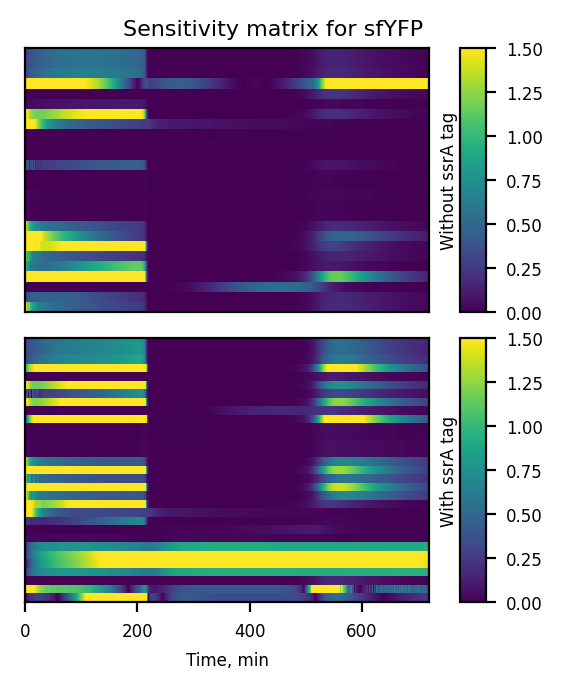

In [15]:
w,h = 3.3,3.6
#w,h = 9,9
# Optimized version of the figure with thicker colorbars
fig, axs = plt.subplots(2, 1, figsize=(w, h), sharex='col')
fig.subplots_adjust(wspace = 0.1, hspace=0.1)  # More space between subplots

# First heatmap (No tag)
h00 = axs[0].imshow(np.abs(SSM_no_deg[:, i_sorted_no_deg, i_protein].T), cmap=cmap_fig, interpolation='nearest', aspect='auto',
                    extent=[0, 720, Np_no_deg, 0], clim=(0, clim_common))
cbar_no_deg = fig.colorbar(h00, ax = axs[0], pad  = 0.06, aspect = 10)  # Increased aspect for thicker colorbar
cbar_no_deg.ax.tick_params(labelsize = 6)  # Keep the colorbar ticks same size as required
axs[0].set_ylabel('Without ssrA tag', fontsize = 6)  # Keep the font size the same
axs[0].axes.get_xaxis().set_visible(False)  # Hide x-axis for the first subplot

# Second heatmap (With tag)
h01 = axs[1].imshow(np.abs(SSM_deg[:, i_sorted_deg, i_protein].T), cmap=cmap_fig, interpolation='nearest', aspect='auto',
                    extent=[0, 720, Np_deg, 0], clim=(0, clim_common))
cbar_deg = fig.colorbar(h01, ax=axs[1], pad=0.06, aspect=10)  # Increased aspect for thicker colorbar
cbar_deg.ax.tick_params(labelsize = 6)  # Keep the colorbar ticks same size as required
axs[1].set_ylabel('With ssrA tag', fontsize = 6)  # Keep the font size the same
axs[1].set_xlabel('Time, min', fontsize = 6)  # Keep the x-axis label font size

# Removing y-ticks from both plots for cleaner appearance
for ax in axs:
    ax.set_yticks([])
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()

# Improve figure layout without changing fontsize
plt.xticks(fontsize = 6)

# # Tight layout to remove excessive whitespace
# fig.tight_layout(rect=[0, 0, 1, 0.95])

# Update the title placement to avoid overlap, but keep the same font size
fig.suptitle('Sensitivity matrix for sfYFP', fontsize = 8, y=0.92)

# Save the figure with better padding and optimization for tight spaces
#fig.savefig('SSM_stacked.svg', dpi=300, bbox_inches = 'tight')

### Preparing data to be exported to datagraph 
Datagraph is a plotting tool and it can plot heatmaps if we give the data in certain format. The 2d array needs to flattened out to 1d and we need to provide labels for each axes in a flattened format. 
For example an array of form: <br>
....A...B...C <br>
P...1...2...3 <br>
Q...4...5...6 <br>
R...7...8...9 <br>

We need to provide 3 arrays that look like: <br> <br>

x = [A, B, C, A, B, C, A, B, C] <br>
y = [P, P, P, Q, Q, Q, R, R, R] <br>
z = [1, 2, 3, 4, 5, 6, 7, 8, 9] <br>

In [16]:
# ## Preparing for SSM with degtag: 

# # Flatten the sensitivity matrix
# z = np.abs(SSM_deg[:,:,i_protein].T).flatten()

# param_list = np.array(list(model_degtag.get_parameter_dictionary().keys()))

# # Create x and y using meshgrid and flattening
# timepoints_repeated = np.tile(timepoints[:tf_I], len(param_list))
# parameters_repeated = np.repeat(param_list, len(timepoints[:tf_I]))

# # Convert to lists
# y = parameters_repeated.tolist()
# x = timepoints_repeated.tolist()
# z = z.tolist()

# heat_map = dict()
# heat_map['x'] = x
# heat_map['y'] = y
# heat_map['z'] = z

# heat_map_df = pd.DataFrame(data = heat_map)
# #heat_map_df.to_csv('SSM_deg_to_datagrap.csv') # un-comment when needed

# np.shape(z)

In [17]:
# ## Preparing for SSM without degtag: 

# # Flatten the sensitivity matrix
# z = np.abs(SSM_no_deg[:,:,i_protein].T).flatten()

# param_list = np.array(list(model_no_tag.get_parameter_dictionary().keys()))


# # Create x and y using meshgrid and flattening
# timepoints_repeated = np.tile(timepoints[:tf_I], len(param_list))
# parameters_repeated = np.repeat(param_list, len(timepoints[:tf_I]))

# # Convert to lists
# y = parameters_repeated.tolist()
# x = timepoints_repeated.tolist()
# z = z.tolist()

# heat_map = dict()
# heat_map['x'] = x
# heat_map['y'] = y
# heat_map['z'] = z

# heat_map_df = pd.DataFrame(data = heat_map)
# #heat_map_df.to_csv('SSM_no_deg_to_datagrap.csv') # un-comment when needed

# np.shape(z)